Low defect images. Case 2 : wrong white bar within a bar.

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils
import math
import matplotlib.patches as patches
import time

In [6]:
import importlib  

module = importlib.import_module('1) APIs')
detect_boundingBox = module.detect_boundingBox
rotate_image_boundingBox = module.rotate_image_boundingBox
rotate_image_boundingBox = module.rotate_image_boundingBox
fix_horizontalBars_case = module.fix_horizontalBars_case

In [7]:
from os import listdir
from os.path import isfile, join
images_paths = [f for f in listdir('../images') if isfile(join('../images', f))]

### TEST ON THE FIRST LOW-DEFECT IMAGE

In [8]:
image_path = f'../images/{images_paths[10]}'

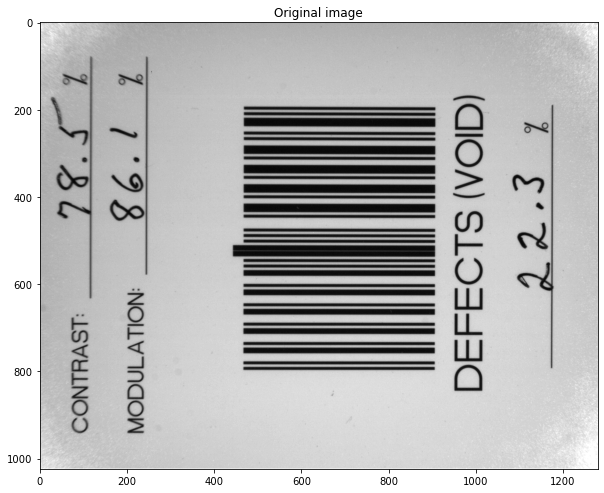

In [11]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray, 'gray')
plt.title('Original image')        

# 1) DETECT ROI
bb_points_sorted, bb_width, bb_height, threshold = detect_boundingBox(image, 
                                        visualize_bounding_box=False)

# 2) ROTATE IMAGE AND BOUNDING BOX
image_rot, bb_points_sorted_rot = rotate_image_boundingBox(image, bb_points_sorted, bb_width, bb_height, 
                                                       visualize_rot_image_bb=False)

# 3) FIX HORIZONTAL BARS CASE
image_rot, bb_points_sorted_rot, bb_width, bb_height = fix_horizontalBars_case(image_rot, bb_points_sorted_rot, bb_width, 
                                                                               bb_height, 
                                            visualize_fixed_image_bb=False)


# ROI image
gray_rot = cv2.cvtColor(image_rot, cv2.COLOR_BGR2GRAY)  # Gray rotated image
roi_image = gray_rot[int(bb_points_sorted_rot[0][1]):int(bb_points_sorted_rot[0][1]+bb_height), 
                         int(bb_points_sorted_rot[0][0]):int(bb_points_sorted_rot[0][0]+bb_width)]

The wrong white bar is evident. Low defect.

Text(0.5, 1.0, 'Thresholded ROI image')

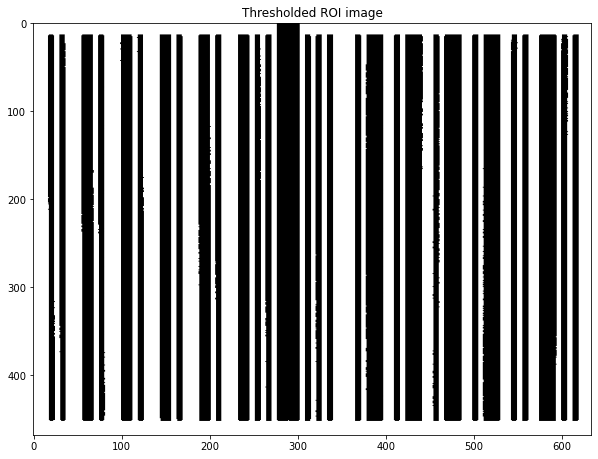

In [12]:
threshold ,ROI_thresh = cv2.threshold(roi_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.imshow(ROI_thresh, 'gray')
plt.title('Thresholded ROI image')

**The wrong white bar is not present anymore, thanks to the thresholding!!!**

## TESTS ALSO ON OTHER LOW-DEFECT IMAGES

In [13]:
def inspect_thresholded_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(10,10))
    plt.imshow(gray, 'gray')
    plt.title('Original image')        

    # 1) DETECT ROI
    bb_points_sorted, bb_width, bb_height, threshold = detect_boundingBox(image, 
                                            visualize_bounding_box=False)

    # 2) ROTATE IMAGE AND BOUNDING BOX
    image_rot, bb_points_sorted_rot = rotate_image_boundingBox(image, bb_points_sorted, bb_width, bb_height, 
                                                           visualize_rot_image_bb=False)


    # ROI image
    gray_rot = cv2.cvtColor(image_rot, cv2.COLOR_BGR2GRAY)  # Gray rotated image
    roi_image = gray_rot[int(bb_points_sorted_rot[0][1]):int(bb_points_sorted_rot[0][1]+bb_height), 
                             int(bb_points_sorted_rot[0][0]):int(bb_points_sorted_rot[0][0]+bb_width)]
    
    threshold ,ROI_thresh = cv2.threshold(roi_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.figure(figsize=(10,10))
    plt.imshow(ROI_thresh, 'gray')
    plt.title('Thresholded ROI image')

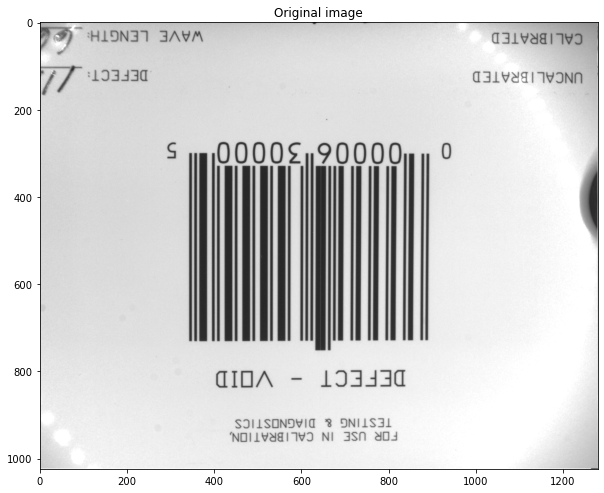

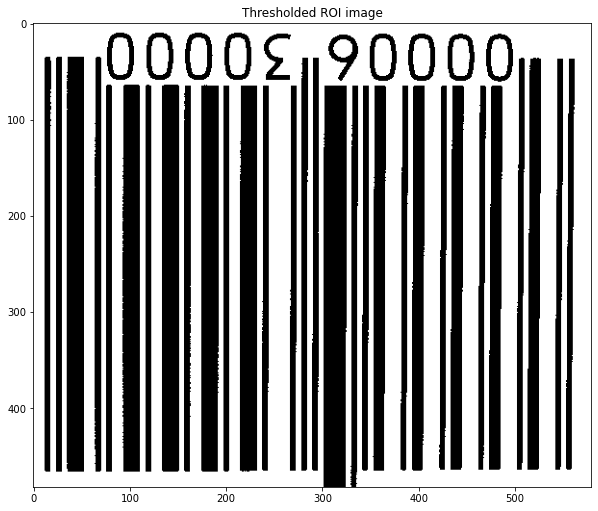

In [14]:
image_path = f'../images/{images_paths[38]}'
inspect_thresholded_image(image_path)

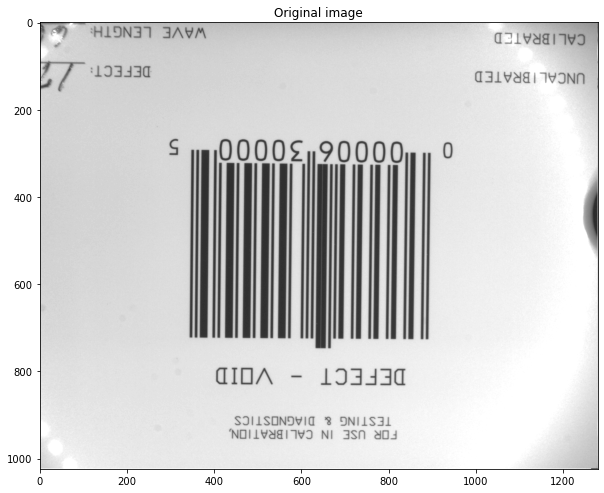

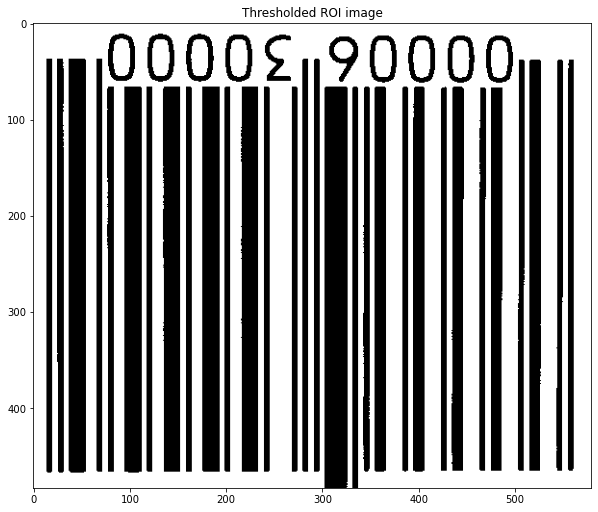

In [15]:
image_path = f'../images/{images_paths[39]}'
inspect_thresholded_image(image_path)

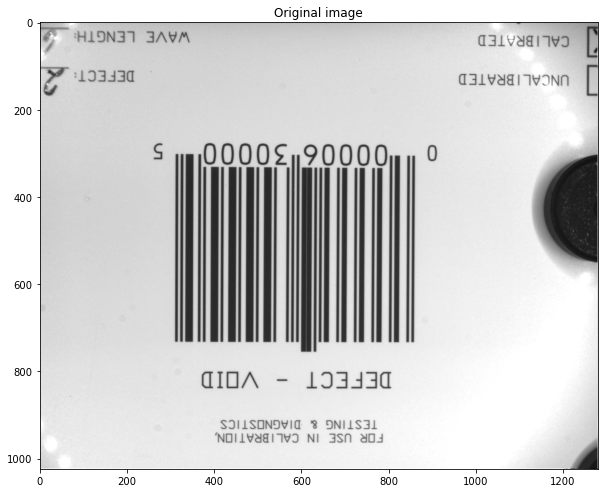

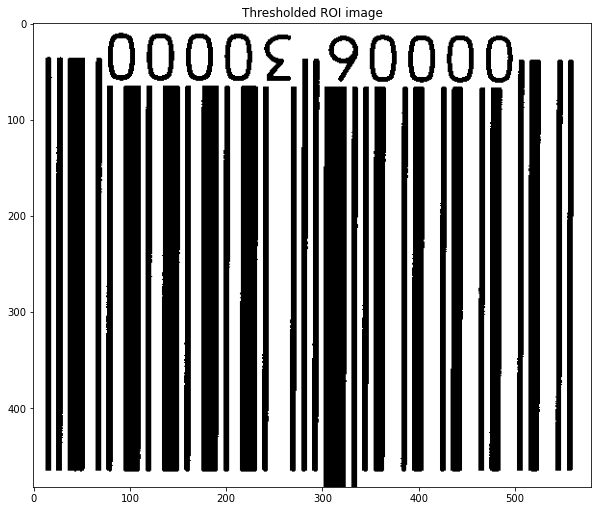

In [16]:
image_path = f'../images/{images_paths[40]}'
inspect_thresholded_image(image_path)

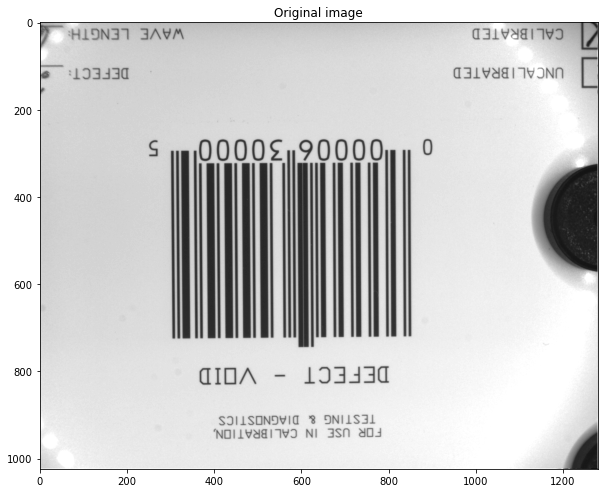

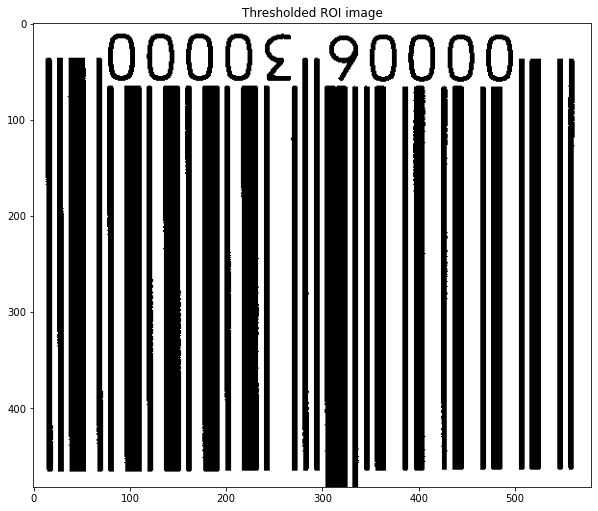

In [17]:
image_path = f'../images/{images_paths[41]}'
inspect_thresholded_image(image_path)

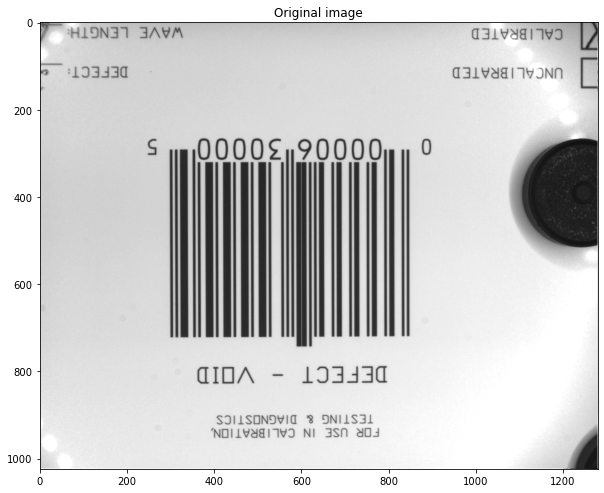

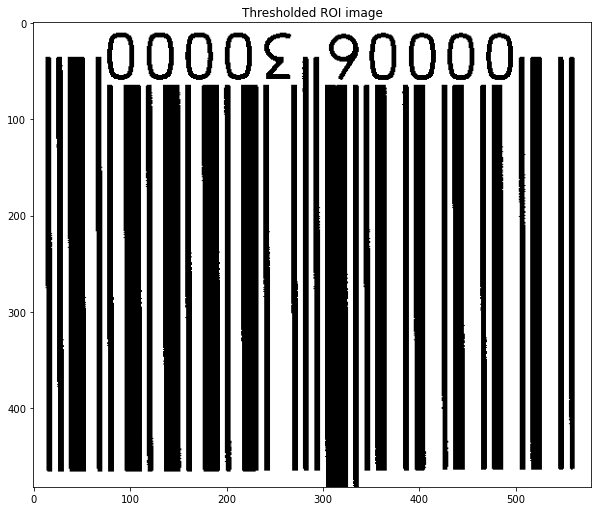

In [18]:
image_path = f'../images/{images_paths[42]}'
inspect_thresholded_image(image_path)

**It is confirmed: the thresholding operator deletes these wrong white bars!**